#### First of all let's load the csv, pandas and store the dataframe in a variable netflix_df

In [6]:
import pandas as pd
import seaborn as sns
netflix_df = pd.read_csv('data/netflix_titles.csv')

#### ❓What is the column with most missing values ? How many missing values has the column country ? 

In [8]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

#### ❓What are all the different "type" of content offered by netflix ?

In [10]:
netflix_df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

#### ❓What are the share of Movies vs TV shows ? 

Hint : Check this : https://towardsdatascience.com/getting-more-value-from-the-pandas-value-counts-aa17230907a6

In [14]:
netflix_df['type'].value_counts(normalize=True)

Movie      0.684151
TV Show    0.315849
Name: type, dtype: float64

#### ❓Drop the 11 na values in the date_added

In [19]:
netflix_df.dropna(subset=['date_added'], inplace=True)

#### ❓Create a New Column named date_added_year that stores integer


**Hint** : We will use the .split method of pandas. You will need to set one parameter to split not what's in the cell but the entire column. Then select the column you are looking for

In [27]:
netflix_df['date_added_year'] = pd.to_datetime(netflix_df.date_added).dt.year
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_year
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,NaN,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...,2019
6219,80186475,TV Show,Pokémon the Series,NaN,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...,2019
6220,70272742,TV Show,Justin Time,NaN,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien...",2016
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,NaN,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...,2016


### ❓Show how many movies and TV shows were added each year in the last 5 years 
_A big concern for Netflix Manager is delivering the as much content as possible. Do you think there is one content to priviledge among the other (film, tv show) ?_ Let's see the path netflix are taking

**First step : Create a dataset named last_year_df with only movies added after 2015**

<AxesSubplot:xlabel='date_added_year', ylabel='count'>

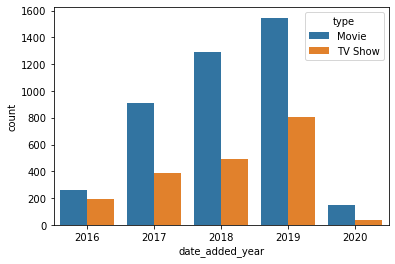

In [36]:
sns.countplot(data=netflix_df[netflix_df['date_added_year']>2015], x='date_added_year', hue='type')

**Second Step** Count for each year how many productions were added for Movies and for TV shows
_hint_ : Have a look at the groupby function.

group_by alone does not return anything readable, it requires something to calculate for each group (see the documentation example : df.groupby("status").mean()

**Can you plot it using seaborn ?**

### ❓Compare number distribution of movie and TV shows for US content and for Indian content

**Create a dataframe named us_prod with only production of content that was displayed in the US**
_hint_ : Look at this : https://www.google.com/search?q=str.contrains+pandas&oq=str.contrains+pandas&aqs=chrome..69i57j0l7.6808j1j4&sourceid=chrome&ie=UTF-8

<AxesSubplot:xlabel='date_added_year', ylabel='count'>

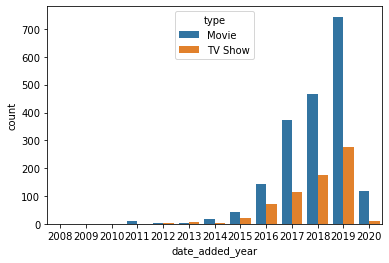

In [52]:
us_prod=netflix_df[netflix_df['country'].fillna('Null').str.contains('United States')]
sns.countplot(data=us_prod, x='date_added_year', hue='type')

**Plot on a graph the distribution of production between Tv shows and Movies in the US over the years**

<AxesSubplot:xlabel='date_added_year', ylabel='count'>

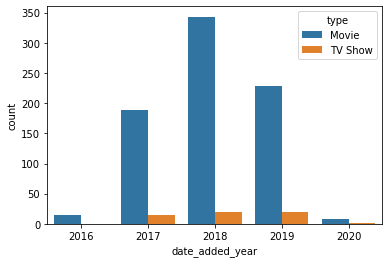

In [53]:
us_prod=netflix_df[netflix_df['country'].fillna('Null').str.contains('India')]
sns.countplot(data=us_prod, x='date_added_year', hue='type')

**Do the same thing for India. Do they follow the same trend ?** 